In [9]:
import tensorflow as tf
physical_device = tf.config.experimental.list_physical_devices('GPU')
print(f'Device found : {physical_device}')

Device found : [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [12]:
tf.config.experimental.get_memory_growth(physical_device[0])

True

In [11]:
# tf.config.experimental.set_memory_growth(physical_device[0],True)

#Uncomment above segment if the previous section did not return a result, or returned 'false'

In [19]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [21]:
sp500data = yf.download("^GSPC", start="2017-01-01", end="2021-10-16")
sp500_df = pd.DataFrame(sp500data)
sp500_df.to_csv("sp500_data.csv")

[*********************100%***********************]  1 of 1 completed


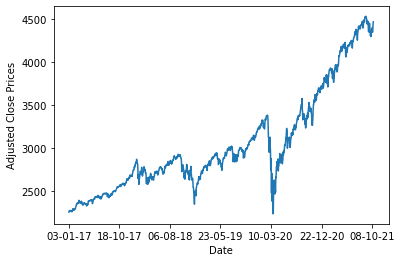

In [22]:
read_df = pd.read_csv("sp500_data.csv")
read_df.set_index("Date", inplace=True)
read_df['Adj Close'].plot()
plt.ylabel("Adjusted Close Prices")
plt.show()

In [26]:
df = pd.read_csv("sp500_data.csv")
df.set_index("Date", inplace=True)
# df.dropna(inplace=True)

In [27]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1206.000000,1206.000000,1206.000000,1206.000000,1206.000000,1.206000e+03
mean,3053.203978,3068.436028,3036.688822,3053.733515,3053.733515,3.894346e+09
std,593.020584,595.512106,591.160603,593.616752,593.616752,1.070493e+09
min,2251.570068,2263.879883,2191.860107,2237.399902,2237.399902,1.296540e+09
25%,2646.380005,2668.990051,2627.190002,2645.412475,2645.412475,3.244368e+09
50%,2872.734985,2889.579956,2857.400024,2876.724976,2876.724976,3.617870e+09
75%,3335.130005,3350.262512,3318.680054,3333.227478,3333.227478,4.189638e+09
max,4535.379883,4545.850098,4524.660156,4536.950195,4536.950195,9.878040e+09


In [28]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
03-01-17,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3770530000
04-01-17,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3764890000
05-01-17,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3761820000
06-01-17,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3339890000
09-01-17,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3217610000


In [30]:
x = df.iloc[:, 0:5].values
y = df.iloc[:, 4].values

print(x.shape, y.shape)

(1206, 5) (1206,)


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.26,  random_state=0)

In [32]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [34]:
grid_rf = {
    'n_estimators': [20,50,100,500,1000],
    'max_depth': np.arange(1,15,1),
    'min_samples_split': [2,10,9],
    'min_samples_leaf': np.arange(1, 15, 2, dtype= int),
    'bootstrap': [True, False],
    'random_state': [1,2,30,42]
}


In [38]:
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf,
                         cv=3, n_jobs=1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100, random_state=1; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100, random_state=1; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100, random_state=1; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50, random_state=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50, random_state=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=50, random_state=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, min_samples_leaf=7, min_samples_split=9, n_estimators=100, random_state=2; total time=   0.0s
[CV

[CV] END bootstrap=True, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=20, random_state=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=14, min_samples_leaf=1, min_samples_split=9, n_estimators=500, random_state=42; total time=   0.6s
[CV] END bootstrap=True, max_depth=14, min_samples_leaf=1, min_samples_split=9, n_estimators=500, random_state=42; total time=   0.7s
[CV] END bootstrap=True, max_depth=14, min_samples_leaf=1, min_samples_split=9, n_estimators=500, random_state=42; total time=   0.7s
[CV] END bootstrap=False, max_depth=6, min_samples_leaf=9, min_samples_split=9, n_estimators=50, random_state=42; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, min_samples_leaf=9, min_samples_split=9, n_estimators=50, random_state=42; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, min_samples_leaf=9, min_samples_split=9, n_estimators=50, random_state=42; total time=   0.0s
[CV] END bootstrap=False, max_depth=14, min_samples_leaf=5, min_sam

[CV] END bootstrap=True, max_depth=13, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, random_state=1; total time=   1.4s
[CV] END bootstrap=True, max_depth=13, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, random_state=1; total time=   1.5s
[CV] END bootstrap=True, max_depth=13, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, random_state=1; total time=   1.5s
[CV] END bootstrap=False, max_depth=11, min_samples_leaf=13, min_samples_split=9, n_estimators=1000, random_state=1; total time=   1.3s
[CV] END bootstrap=False, max_depth=11, min_samples_leaf=13, min_samples_split=9, n_estimators=1000, random_state=1; total time=   1.3s
[CV] END bootstrap=False, max_depth=11, min_samples_leaf=13, min_samples_split=9, n_estimators=1000, random_state=1; total time=   1.4s
[CV] END bootstrap=False, max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=50, random_state=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=6, min_samples_lea

[CV] END bootstrap=False, max_depth=7, min_samples_leaf=11, min_samples_split=10, n_estimators=500, random_state=42; total time=   0.6s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=11, min_samples_split=9, n_estimators=500, random_state=30; total time=   0.5s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=11, min_samples_split=9, n_estimators=500, random_state=30; total time=   0.6s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=11, min_samples_split=9, n_estimators=500, random_state=30; total time=   0.5s
[CV] END bootstrap=True, max_depth=14, min_samples_leaf=5, min_samples_split=9, n_estimators=50, random_state=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=14, min_samples_leaf=5, min_samples_split=9, n_estimators=50, random_state=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=14, min_samples_leaf=5, min_samples_split=9, n_estimators=50, random_state=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=14, min_samples_leaf=11, min_s

[CV] END bootstrap=False, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, random_state=42; total time=   1.8s
[CV] END bootstrap=False, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, random_state=42; total time=   1.8s
[CV] END bootstrap=False, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, random_state=42; total time=   1.8s
[CV] END bootstrap=True, max_depth=4, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, random_state=42; total time=   1.2s
[CV] END bootstrap=True, max_depth=4, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, random_state=42; total time=   1.2s
[CV] END bootstrap=True, max_depth=4, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, random_state=42; total time=   1.3s
[CV] END bootstrap=True, max_depth=11, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=11, min_samples_leaf=1,

[CV] END bootstrap=False, max_depth=4, min_samples_leaf=5, min_samples_split=10, n_estimators=50, random_state=2; total time=   0.0s
[CV] END bootstrap=False, max_depth=13, min_samples_leaf=9, min_samples_split=10, n_estimators=500, random_state=2; total time=   0.7s
[CV] END bootstrap=False, max_depth=13, min_samples_leaf=9, min_samples_split=10, n_estimators=500, random_state=2; total time=   1.0s
[CV] END bootstrap=False, max_depth=13, min_samples_leaf=9, min_samples_split=10, n_estimators=500, random_state=2; total time=   1.0s
[CV] END bootstrap=True, max_depth=13, min_samples_leaf=3, min_samples_split=2, n_estimators=500, random_state=1; total time=   0.9s
[CV] END bootstrap=True, max_depth=13, min_samples_leaf=3, min_samples_split=2, n_estimators=500, random_state=1; total time=   1.5s
[CV] END bootstrap=True, max_depth=13, min_samples_leaf=3, min_samples_split=2, n_estimators=500, random_state=1; total time=   1.5s
[CV] END bootstrap=False, max_depth=14, min_samples_leaf=9, min

[CV] END bootstrap=True, max_depth=2, min_samples_leaf=13, min_samples_split=9, n_estimators=100, random_state=42; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, min_samples_leaf=13, min_samples_split=9, n_estimators=100, random_state=42; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=9, n_estimators=50, random_state=42; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=9, n_estimators=50, random_state=42; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=9, n_estimators=50, random_state=42; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, min_samples_leaf=5, min_samples_split=9, n_estimators=50, random_state=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, min_samples_leaf=5, min_samples_split=9, n_estimators=50, random_state=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, min_samples_leaf=5, min_samples_s

[CV] END bootstrap=True, max_depth=14, min_samples_leaf=13, min_samples_split=10, n_estimators=500, random_state=2; total time=   0.5s
[CV] END bootstrap=True, max_depth=14, min_samples_leaf=13, min_samples_split=10, n_estimators=500, random_state=2; total time=   0.6s
[CV] END bootstrap=True, max_depth=14, min_samples_leaf=13, min_samples_split=10, n_estimators=500, random_state=2; total time=   0.5s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=1; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, min_samples_leaf=3, min_samples_split=10, n_estimators=50, random_state=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, min_samples_leaf=3, min

[CV] END bootstrap=False, max_depth=11, min_samples_leaf=5, min_samples_split=9, n_estimators=1000, random_state=30; total time=   1.7s
[CV] END bootstrap=False, max_depth=4, min_samples_leaf=5, min_samples_split=9, n_estimators=100, random_state=42; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, min_samples_leaf=5, min_samples_split=9, n_estimators=100, random_state=42; total time=   0.0s
[CV] END bootstrap=False, max_depth=4, min_samples_leaf=5, min_samples_split=9, n_estimators=100, random_state=42; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=5, min_samples_split=9, n_estimators=50, random_state=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=5, min_samples_split=9, n_estimators=50, random_state=30; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=5, min_samples_split=9, n_estimators=50, random_state=30; total time=   0.0s
[CV] END bootstrap=False, max_depth=13, min_samples_leaf=1, min_sa

[CV] END bootstrap=False, max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=20, random_state=1; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=5, min_samples_split=9, n_estimators=1000, random_state=1; total time=   1.8s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=5, min_samples_split=9, n_estimators=1000, random_state=1; total time=   1.7s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=5, min_samples_split=9, n_estimators=1000, random_state=1; total time=   1.8s
[CV] END bootstrap=False, max_depth=12, min_samples_leaf=9, min_samples_split=9, n_estimators=20, random_state=42; total time=   0.0s
[CV] END bootstrap=False, max_depth=12, min_samples_leaf=9, min_samples_split=9, n_estimators=20, random_state=42; total time=   0.0s
[CV] END bootstrap=False, max_depth=12, min_samples_leaf=9, min_samples_split=9, n_estimators=20, random_state=42; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, min_samples_leaf=9, m

In [39]:
model = RandomForestRegressor(n_estimators=500, random_state=42, 
                             min_samples_split=2, min_samples_leaf=1,
                             max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)

[2802.84284489 2269.92121646 2477.73122241 2766.81499321 2374.39130244
 4186.42983472 2634.99511243 3224.93706186 2642.16842814 2854.98965607
 3131.25870701 2469.06462122 4471.0774476  4372.24394925 2449.30026831
 4226.47208519 2639.50745862 2433.12953323 2573.880538   4442.41905226
 3804.16246025 3462.4487242  3693.37068009 2953.08585865 2977.18621393
 4365.61216463 3207.22272671 2557.41997133 4457.03170425 3246.88811063
 3909.86812323 2895.42480358 2839.78039927 2721.44343336 2278.37426346
 2782.99596302 3380.37797459 2515.38387592 2365.22851419 2941.68000562
 3469.53228822 4514.9596425  4251.46551876 3916.50240724 2659.1925014
 2976.57808955 3184.02503194 4439.55898034 2751.48623063 2278.95166938
 4203.68463227 3726.99570335 2951.4177852  2811.72932443 2872.59430459
 2426.04215786 2344.66447027 2737.90401809 2884.67512643 3285.98546474
 3556.36025727 2395.39792047 4146.39518539 2874.49330172 3965.57239321
 2931.20480999 4194.64209133 3074.73200477 4523.8214689  3225.91745846
 2882.0

In [40]:
print("Mean Absolute Error:", 
      round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:",
      round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:",
      round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:",
      round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score: {model.score(x_train, y_train)*100:2f}% and \
      Test Score: {model.score(x_test, y_test)* 100:2f}% \
      using Random Tree Regressor')

errors = abs(predict - y_test)
mape = 100 * (errors/y_test)
accuracy = 100 -np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 2.3044
Mean Squared Error: 16.6703
Root Mean Squared Error: 4.0829
(R^2) Score: 1.0
Train Score: 99.999370% and       Test Score: 99.995604%       using Random Tree Regressor
Accuracy: 99.93 %.


In [42]:
predictions = pd.DataFrame({"Predictions": predict},
                          index = pd.date_range(start=df.index[-1],
                                               periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")
#collects future days from predicted values

oneyear_df = pd.DataFrame(predictions[:252])
oneyear_df.to_csv("one-year-predictions.csv")

onemonth_df = pd.DataFrame(predictions[:21])
onemonth_df.to_csv("one-month-predictions.csv")

fivedays_df = pd.DataFrame(predictions[:5])
fivedays_df.to_csv("five-days-predictions.csv")

<h1>One Year DF Prediction</h1>

Buy Price & Date
          Predictions
Date                 
16-10-21  2269.921216
Sell Price & Date
          Predictions
Date                 
22-12-21  4523.821469


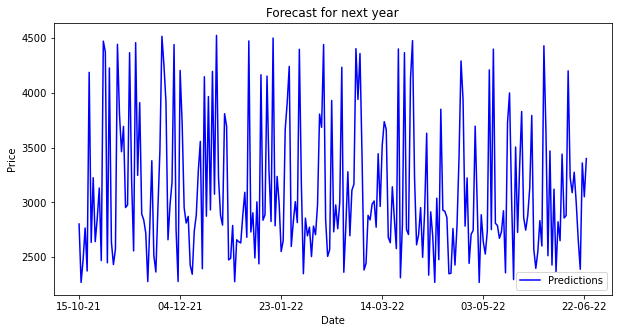

In [44]:
oneyear_df_pred = pd.read_csv("one-year-predictions.csv")
oneyear_df_pred.set_index("Date", inplace=True)

buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])

oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"]==buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"]==sell_price]

print("Buy Price & Date")
print(oneyear_buy)

print("Sell Price & Date")
print(oneyear_sell)

oneyear_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for next year", 
                                    color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

<h1>One Month Prediction</h1>

Buy Price & Date
          Predictions
Date                 
16-10-21  2269.921216
Sell Price & Date
          Predictions
Date                 
27-10-21  4471.077448


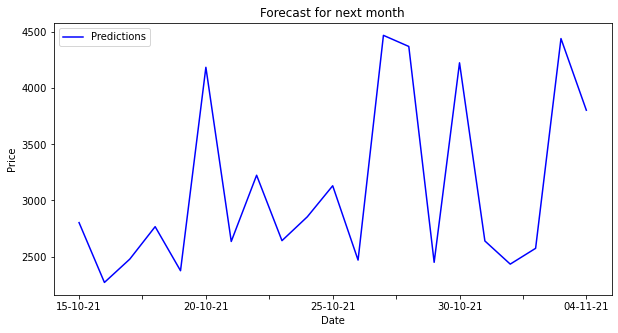

In [47]:
onemonth_df_pred = pd.read_csv("one-month-predictions.csv")
onemonth_df_pred.set_index("Date", inplace=True)

buy_price = min(onemonth_df_pred["Predictions"])
sell_price = max(onemonth_df_pred["Predictions"])

onemonth_buy = onemonth_df_pred.loc[onemonth_df_pred["Predictions"]==buy_price]
onemonth_sell = onemonth_df_pred.loc[onemonth_df_pred["Predictions"]==sell_price]

print("Buy Price & Date")
print(onemonth_buy)
print("Sell Price & Date")
print(onemonth_sell)

onemonth_df_pred["Predictions"].plot(figsize=(10,5), 
                                     title="Forecast for next month", 
                                     color = "blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

<h1>Five Days Prediction</h1>

Buy Price & Date
          Predictions
Date                 
16-10-21  2269.921216
Sell Price & Date
          Predictions
Date                 
15-10-21  2802.842845


Text(0, 0.5, 'Price')

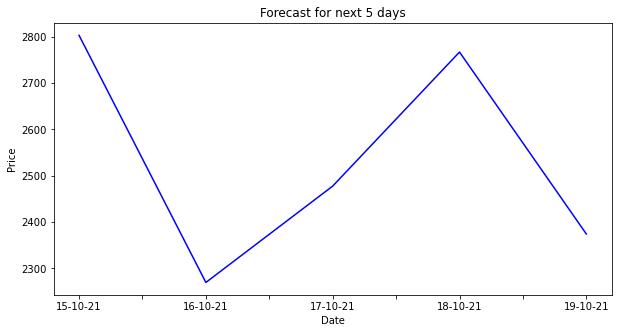

In [48]:
fivedays_df_pred = pd.read_csv("five-days-predictions.csv")
fivedays_df_pred.set_index("Date", inplace=True)

sell_price = max(fivedays_df_pred["Predictions"])
buy_price = min(fivedays_df_pred["Predictions"])

fivedays_buy = fivedays_df_pred.loc[fivedays_df_pred["Predictions"]==buy_price]
fivedays_sell = fivedays_df_pred.loc[fivedays_df_pred["Predictions"]==sell_price]

print("Buy Price & Date")
print(fivedays_buy)

print("Sell Price & Date")
print(fivedays_sell)

fivedays_df_pred["Predictions"].plot(figsize = (10,5),
                                    title = "Forecast for next 5 days",
                                    color = "blue")
plt.xlabel("Date")
plt.ylabel("Price")